In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import gc
from sklearn import preprocessing
%matplotlib inline

In [2]:
def upload_file(fname):
    data = pd.read_csv("Our Dataset/" + fname + ".csv",  index_col=False)
    return data

In [42]:
def upload_file(fname):
    pos = pd.read_csv("Our Dataset/csv/" + fname + "pos" + ".csv", index_col=False)
    neg = pd.read_csv("Our Dataset/csv/" + fname + "neg" + ".csv", index_col=False)
    return pos, neg

In [19]:
def make_columns(electrodes):
    newCols = []
    for col in electrodes:
        for i in range(192):
            newCols.append(col + '.' + str(i))
    newCols.append('y')
    return newCols

In [40]:
def number_of_events():
    neg = 0
    zero = 0
    one = 0
    two = 0
    three = 0
    for i in range(len(data)):
        if(data["y"][i] == 0):
            zero+=1
        elif(data["y"][i] == 1):
            one+=1
        elif(data["y"][i] == -1):
            neg +=1
        elif(data["y"][i] == 2):
            two+=1
        elif(data["y"][i] == 3):
            three+=1
    print(neg)
    print(zero)
    print(one)
    print(two)
    print(three)

In [41]:
def convert_to_row(start, label, electrodes, data):
    row = []
    for col in electrodes:
        row += data[col][start:start+192].tolist()
    row += [label]
    return row

In [50]:
def positive_events(newCols, y, data, electrodes):
    posDfs = pd.DataFrame(columns = newCols)
    indices = []
    j = 0
    while j < (len(y)):
        #assume positive events are: pedestrian, dog, collision, and leadning car brake
        if (y[j] != 0):
            if (j+192 < len(y) and check_if_driver_brake(j, data)):
                posDfs.loc[len(posDfs)] = convert_to_row(j, 1, electrodes, data)
                indices.append(j)
                j += 384 #192*2
            else:
                j+=1
        else:
            j += 1
    return posDfs, indices  

In [43]:
def check_if_driver_brake(start_stim, data):
    for i in range(start_stim,start_stim+192):
        if(data["Brake Pedal"][i] == 1):
            return True
    return False

In [44]:
def negative_events(indices, newCols, y, data, electrodes):
    negDfs = pd.DataFrame(columns = newCols)
    j = 0
    while j < (len(y)):
        if(len(indices) > 0 and j <= indices[0] and j+192 > indices[0]):
            j = indices[0] + 384
            indices.pop(0)
        elif(j+192 < len(y)):
            negDfs.loc[len(negDfs)] = convert_to_row(j, 0, electrodes, data)
            j += 192
        else:
            break
    return negDfs

In [56]:
def draw_signals(subject, posDfs, negDfs):
    meanPos = preprocessing.scale(np.mean(posDfs.drop("y", axis = 1)))
    meanNeg = preprocessing.scale(np.mean(negDfs.drop("y", axis = 1)))
    cols = list(posDfs)
    for i in range(14):
        name = cols[i*192].split('.')[0]
        plt.ylim(-10, 10)
        plt.title(subject + ": " + name, fontsize=16, fontweight='bold')
        plt.plot(meanPos[i*192:i*192+192], label="Braking Event")
        plt.plot(meanNeg[i*192:i*192+192], label="Normal Driving")
        plt.legend()
        plt.show()
    return meanPos, meanNeg

In [100]:
def upload_and_draw(folder):
    data = upload_file(folder + "/Subject")
    data = data.drop("COUNTER", axis = 1)
    for f in fnames:
        d = upload_file(folder + "/" + f)
        d = d.drop("COUNTER", axis = 1)
        data = data.append(d, ignore_index=True)
    electrodes = data.columns.drop(["Brake Pedal", "y"])
    newCols = make_columns(electrodes)
    y = data["y"]
    posDfs, indices = positive_events(newCols, y, data, electrodes)
    posDfs.to_csv("Our Dataset/csv/"+folder+"pos.csv", index = False)
    negDfs = negative_events(indices, newCols, y, data, electrodes)
    negDfs.to_csv("Our Dataset/csv/"+folder+"neg.csv", index = False)
    meanPos, meanNeg = draw_signals(folder, posDfs, negDfs)
    return newCols

In [105]:
fnames = ["Subject_1", "Subject_2"]

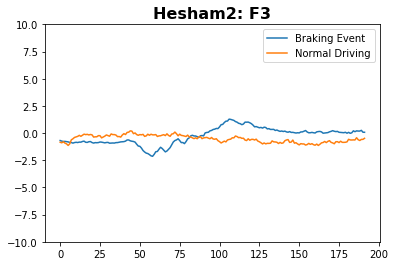

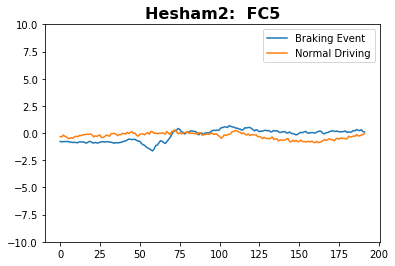

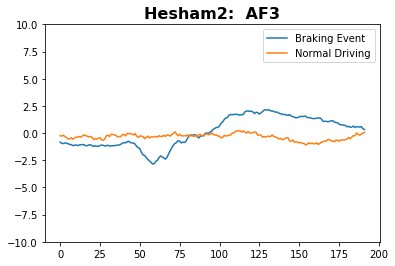

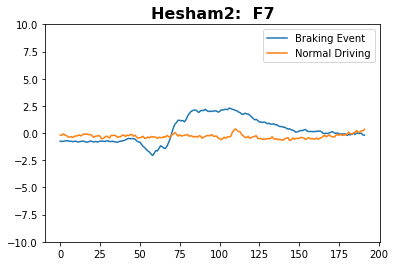

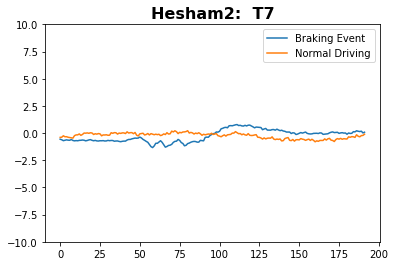

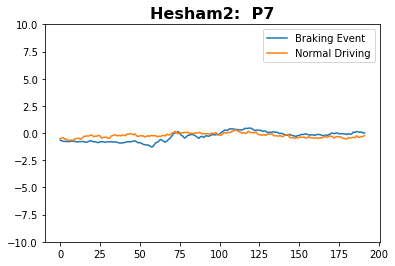

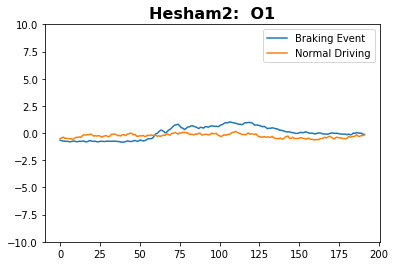

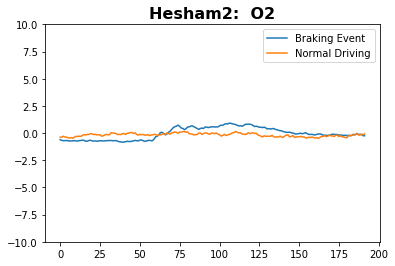

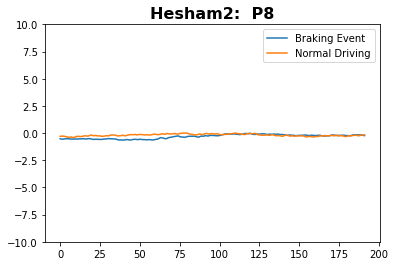

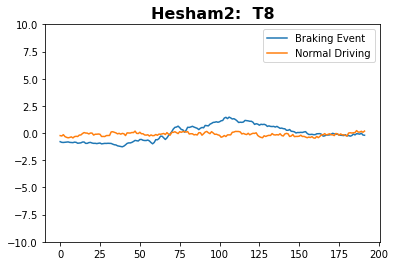

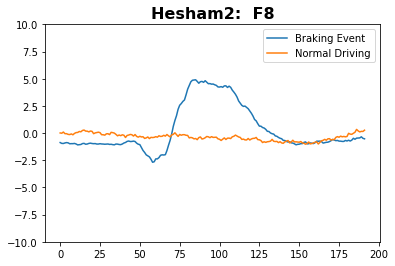

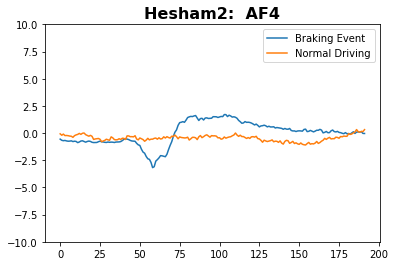

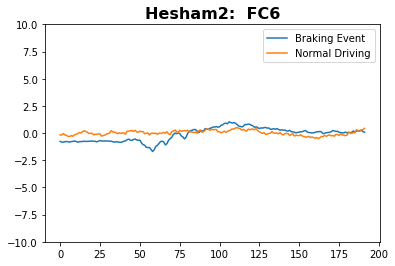

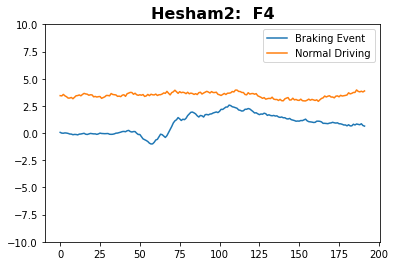

In [106]:
newCols = upload_and_draw("Hesham2")

In [107]:
fnames = ["Subject_1"]

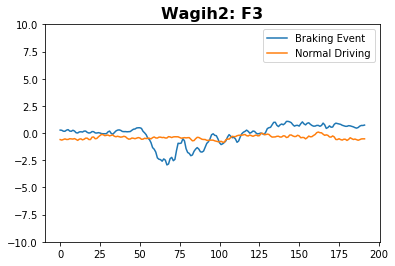

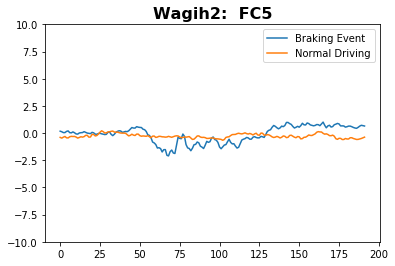

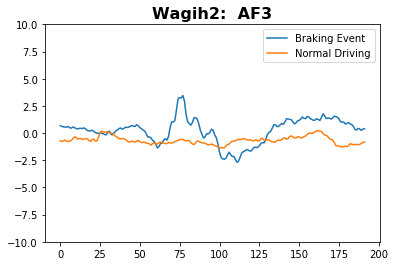

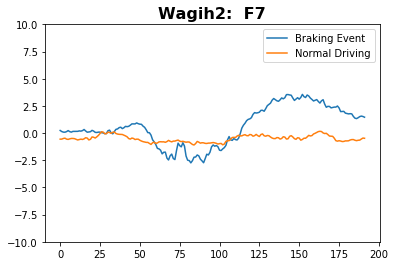

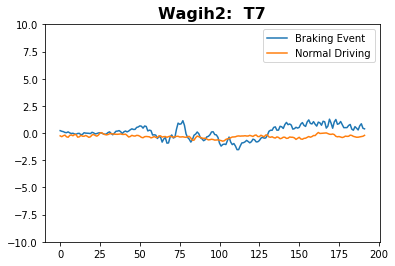

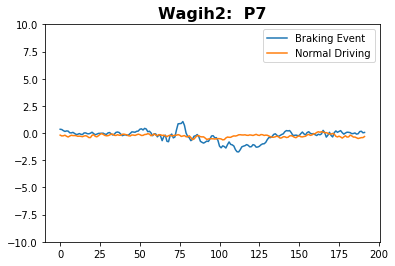

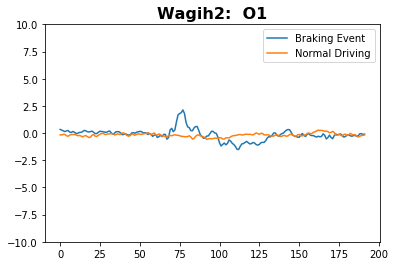

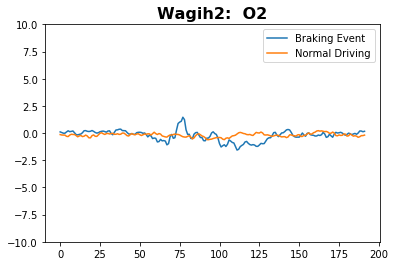

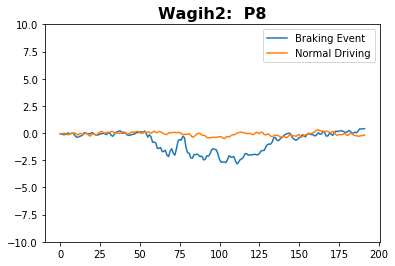

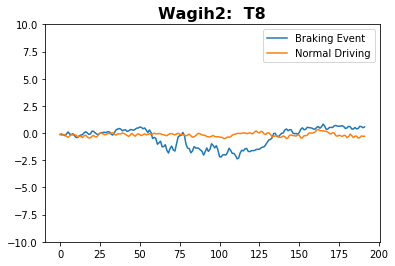

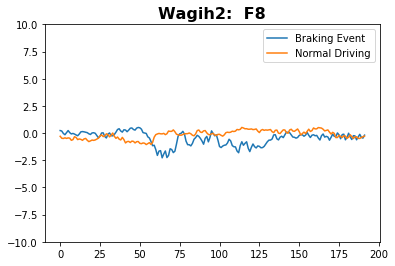

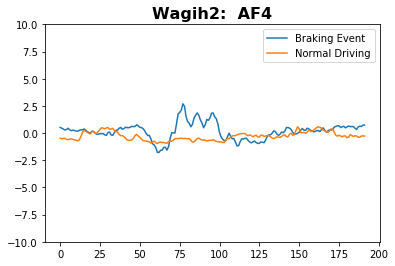

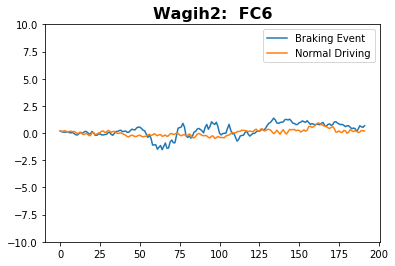

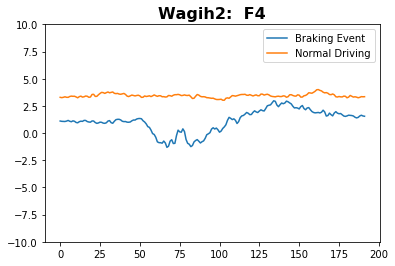

['F3.0',
 'F3.1',
 'F3.2',
 'F3.3',
 'F3.4',
 'F3.5',
 'F3.6',
 'F3.7',
 'F3.8',
 'F3.9',
 'F3.10',
 'F3.11',
 'F3.12',
 'F3.13',
 'F3.14',
 'F3.15',
 'F3.16',
 'F3.17',
 'F3.18',
 'F3.19',
 'F3.20',
 'F3.21',
 'F3.22',
 'F3.23',
 'F3.24',
 'F3.25',
 'F3.26',
 'F3.27',
 'F3.28',
 'F3.29',
 'F3.30',
 'F3.31',
 'F3.32',
 'F3.33',
 'F3.34',
 'F3.35',
 'F3.36',
 'F3.37',
 'F3.38',
 'F3.39',
 'F3.40',
 'F3.41',
 'F3.42',
 'F3.43',
 'F3.44',
 'F3.45',
 'F3.46',
 'F3.47',
 'F3.48',
 'F3.49',
 'F3.50',
 'F3.51',
 'F3.52',
 'F3.53',
 'F3.54',
 'F3.55',
 'F3.56',
 'F3.57',
 'F3.58',
 'F3.59',
 'F3.60',
 'F3.61',
 'F3.62',
 'F3.63',
 'F3.64',
 'F3.65',
 'F3.66',
 'F3.67',
 'F3.68',
 'F3.69',
 'F3.70',
 'F3.71',
 'F3.72',
 'F3.73',
 'F3.74',
 'F3.75',
 'F3.76',
 'F3.77',
 'F3.78',
 'F3.79',
 'F3.80',
 'F3.81',
 'F3.82',
 'F3.83',
 'F3.84',
 'F3.85',
 'F3.86',
 'F3.87',
 'F3.88',
 'F3.89',
 'F3.90',
 'F3.91',
 'F3.92',
 'F3.93',
 'F3.94',
 'F3.95',
 'F3.96',
 'F3.97',
 'F3.98',
 'F3.99',
 'F3.100',

In [108]:
upload_and_draw("Wagih2")

In [109]:
fnames = ["Subject_1", "Subject_2", "Subject_3", "Subject_4"]

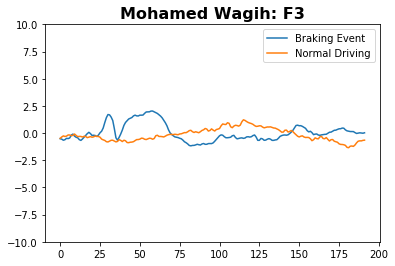

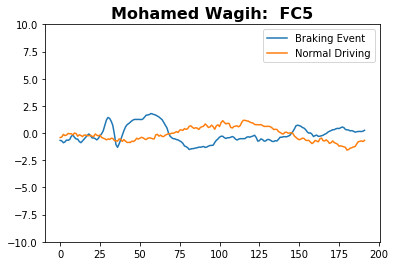

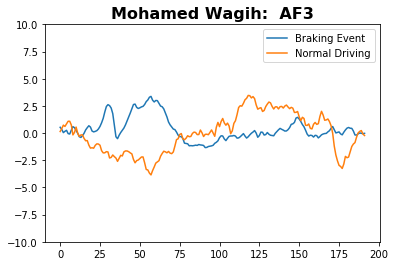

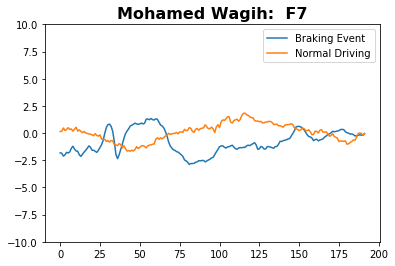

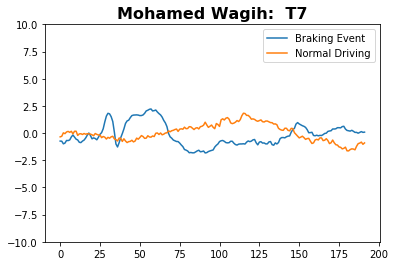

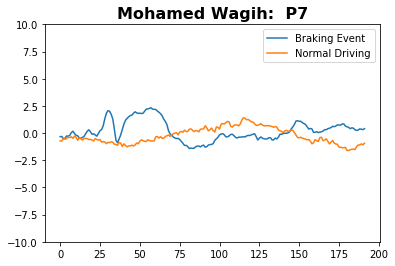

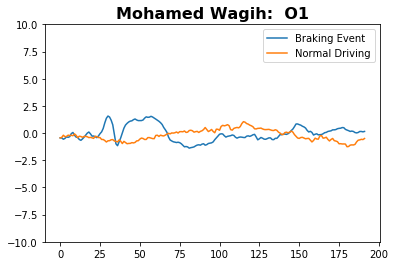

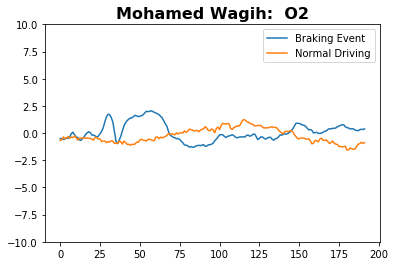

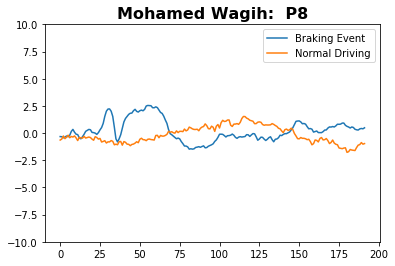

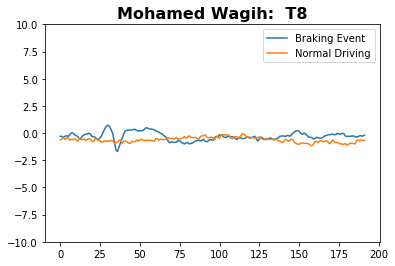

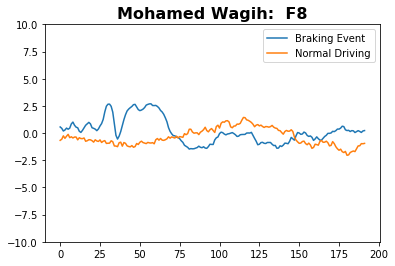

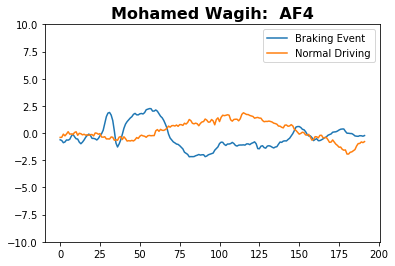

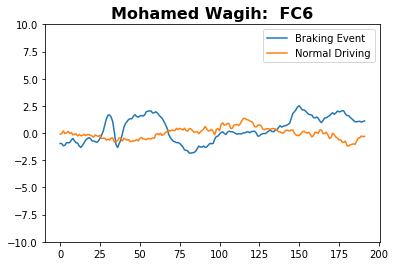

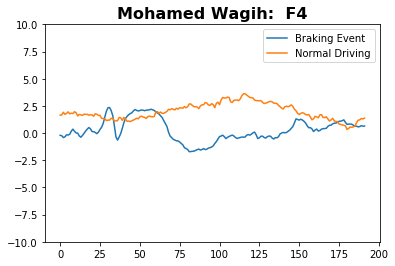

['F3.0',
 'F3.1',
 'F3.2',
 'F3.3',
 'F3.4',
 'F3.5',
 'F3.6',
 'F3.7',
 'F3.8',
 'F3.9',
 'F3.10',
 'F3.11',
 'F3.12',
 'F3.13',
 'F3.14',
 'F3.15',
 'F3.16',
 'F3.17',
 'F3.18',
 'F3.19',
 'F3.20',
 'F3.21',
 'F3.22',
 'F3.23',
 'F3.24',
 'F3.25',
 'F3.26',
 'F3.27',
 'F3.28',
 'F3.29',
 'F3.30',
 'F3.31',
 'F3.32',
 'F3.33',
 'F3.34',
 'F3.35',
 'F3.36',
 'F3.37',
 'F3.38',
 'F3.39',
 'F3.40',
 'F3.41',
 'F3.42',
 'F3.43',
 'F3.44',
 'F3.45',
 'F3.46',
 'F3.47',
 'F3.48',
 'F3.49',
 'F3.50',
 'F3.51',
 'F3.52',
 'F3.53',
 'F3.54',
 'F3.55',
 'F3.56',
 'F3.57',
 'F3.58',
 'F3.59',
 'F3.60',
 'F3.61',
 'F3.62',
 'F3.63',
 'F3.64',
 'F3.65',
 'F3.66',
 'F3.67',
 'F3.68',
 'F3.69',
 'F3.70',
 'F3.71',
 'F3.72',
 'F3.73',
 'F3.74',
 'F3.75',
 'F3.76',
 'F3.77',
 'F3.78',
 'F3.79',
 'F3.80',
 'F3.81',
 'F3.82',
 'F3.83',
 'F3.84',
 'F3.85',
 'F3.86',
 'F3.87',
 'F3.88',
 'F3.89',
 'F3.90',
 'F3.91',
 'F3.92',
 'F3.93',
 'F3.94',
 'F3.95',
 'F3.96',
 'F3.97',
 'F3.98',
 'F3.99',
 'F3.100',

In [110]:
upload_and_draw("Mohamed Wagih")

In [111]:
fnames = ["Subject_1", "Subject_2", "Subject_3", "Subject_4", "Subject_5", "Subject_6", "Subject_7", "Subject_8",
          "Subject_9", "Subject_10", "Subject_11"]

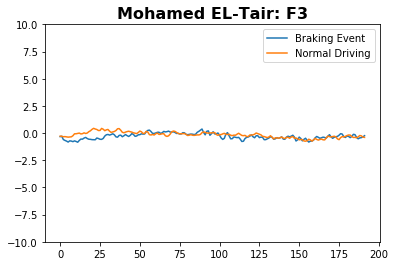

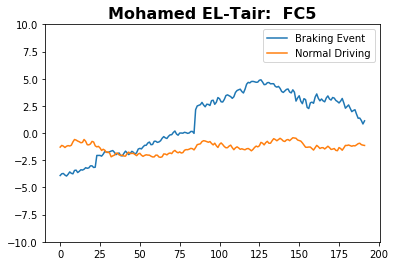

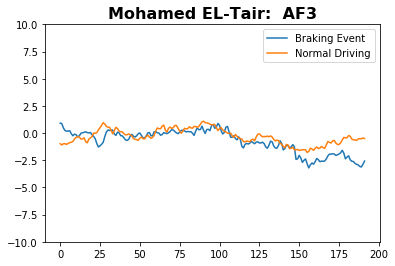

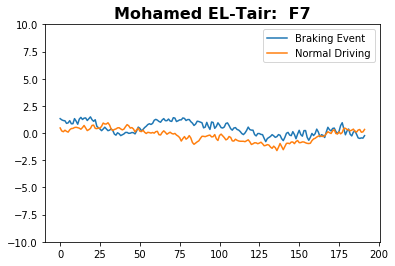

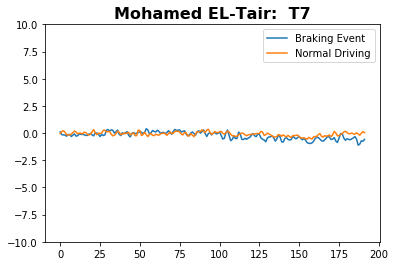

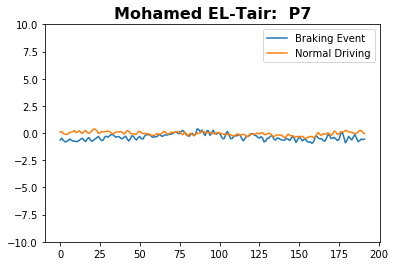

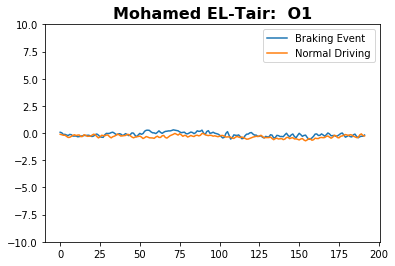

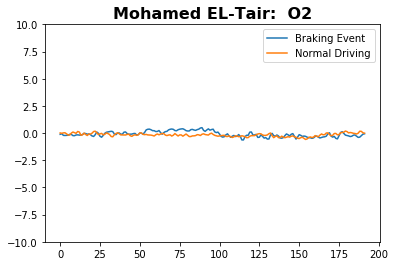

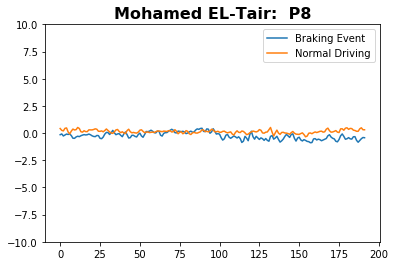

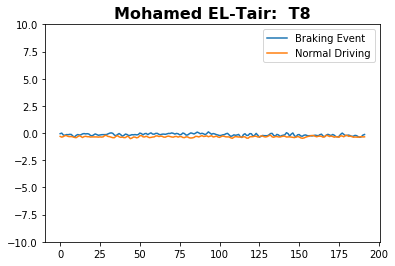

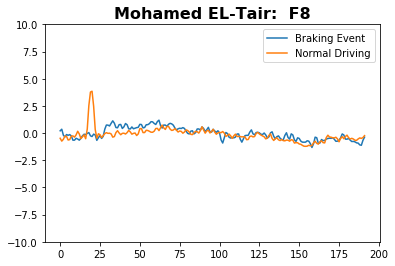

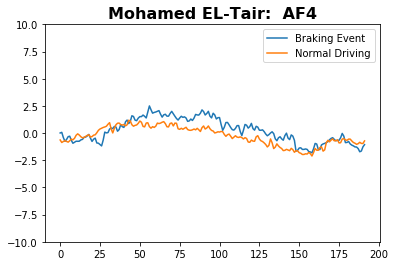

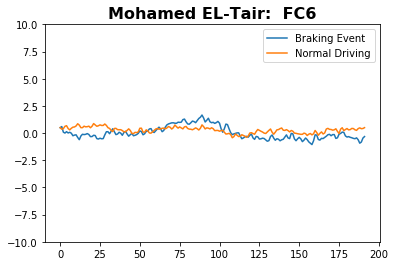

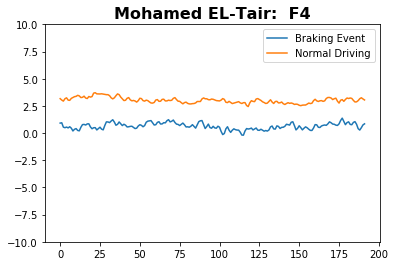

['F3.0',
 'F3.1',
 'F3.2',
 'F3.3',
 'F3.4',
 'F3.5',
 'F3.6',
 'F3.7',
 'F3.8',
 'F3.9',
 'F3.10',
 'F3.11',
 'F3.12',
 'F3.13',
 'F3.14',
 'F3.15',
 'F3.16',
 'F3.17',
 'F3.18',
 'F3.19',
 'F3.20',
 'F3.21',
 'F3.22',
 'F3.23',
 'F3.24',
 'F3.25',
 'F3.26',
 'F3.27',
 'F3.28',
 'F3.29',
 'F3.30',
 'F3.31',
 'F3.32',
 'F3.33',
 'F3.34',
 'F3.35',
 'F3.36',
 'F3.37',
 'F3.38',
 'F3.39',
 'F3.40',
 'F3.41',
 'F3.42',
 'F3.43',
 'F3.44',
 'F3.45',
 'F3.46',
 'F3.47',
 'F3.48',
 'F3.49',
 'F3.50',
 'F3.51',
 'F3.52',
 'F3.53',
 'F3.54',
 'F3.55',
 'F3.56',
 'F3.57',
 'F3.58',
 'F3.59',
 'F3.60',
 'F3.61',
 'F3.62',
 'F3.63',
 'F3.64',
 'F3.65',
 'F3.66',
 'F3.67',
 'F3.68',
 'F3.69',
 'F3.70',
 'F3.71',
 'F3.72',
 'F3.73',
 'F3.74',
 'F3.75',
 'F3.76',
 'F3.77',
 'F3.78',
 'F3.79',
 'F3.80',
 'F3.81',
 'F3.82',
 'F3.83',
 'F3.84',
 'F3.85',
 'F3.86',
 'F3.87',
 'F3.88',
 'F3.89',
 'F3.90',
 'F3.91',
 'F3.92',
 'F3.93',
 'F3.94',
 'F3.95',
 'F3.96',
 'F3.97',
 'F3.98',
 'F3.99',
 'F3.100',

In [112]:
upload_and_draw("Mohamed EL-Tair")

In [113]:
fnames = ["Subject_1", "Subject_2"]

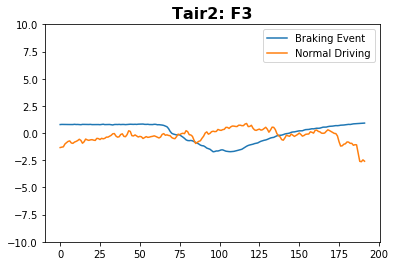

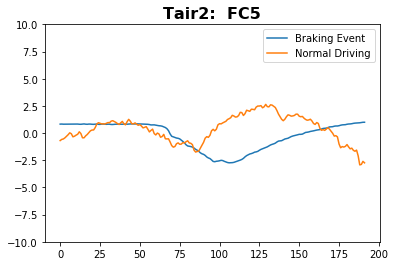

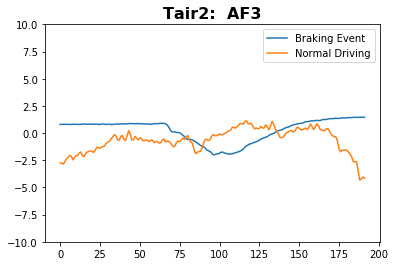

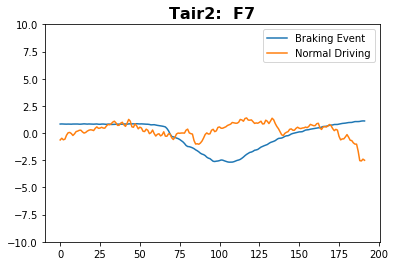

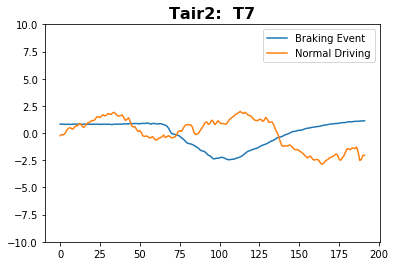

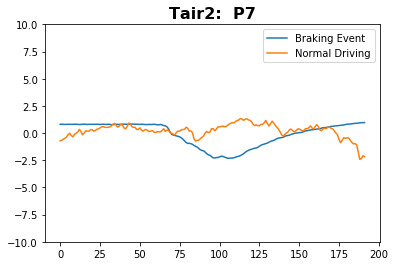

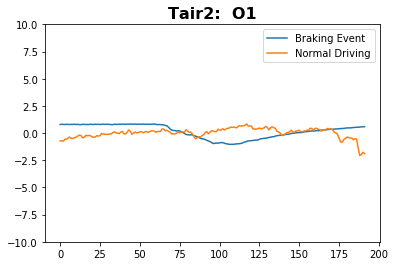

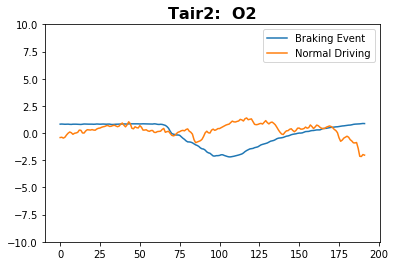

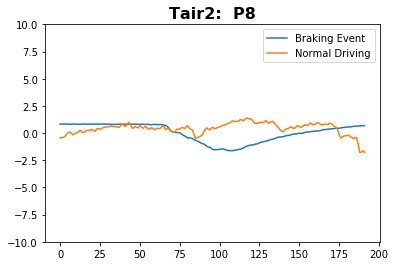

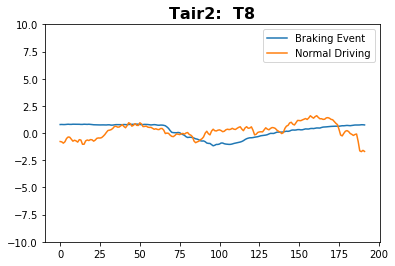

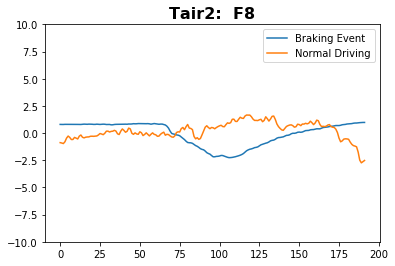

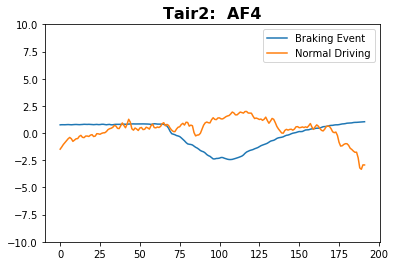

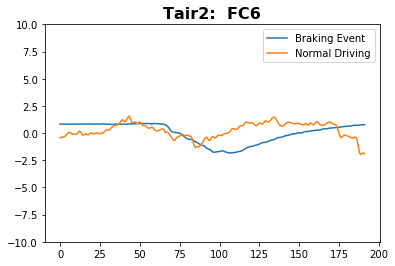

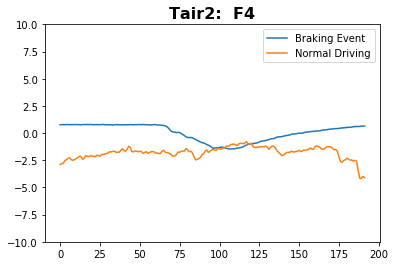

['F3.0',
 'F3.1',
 'F3.2',
 'F3.3',
 'F3.4',
 'F3.5',
 'F3.6',
 'F3.7',
 'F3.8',
 'F3.9',
 'F3.10',
 'F3.11',
 'F3.12',
 'F3.13',
 'F3.14',
 'F3.15',
 'F3.16',
 'F3.17',
 'F3.18',
 'F3.19',
 'F3.20',
 'F3.21',
 'F3.22',
 'F3.23',
 'F3.24',
 'F3.25',
 'F3.26',
 'F3.27',
 'F3.28',
 'F3.29',
 'F3.30',
 'F3.31',
 'F3.32',
 'F3.33',
 'F3.34',
 'F3.35',
 'F3.36',
 'F3.37',
 'F3.38',
 'F3.39',
 'F3.40',
 'F3.41',
 'F3.42',
 'F3.43',
 'F3.44',
 'F3.45',
 'F3.46',
 'F3.47',
 'F3.48',
 'F3.49',
 'F3.50',
 'F3.51',
 'F3.52',
 'F3.53',
 'F3.54',
 'F3.55',
 'F3.56',
 'F3.57',
 'F3.58',
 'F3.59',
 'F3.60',
 'F3.61',
 'F3.62',
 'F3.63',
 'F3.64',
 'F3.65',
 'F3.66',
 'F3.67',
 'F3.68',
 'F3.69',
 'F3.70',
 'F3.71',
 'F3.72',
 'F3.73',
 'F3.74',
 'F3.75',
 'F3.76',
 'F3.77',
 'F3.78',
 'F3.79',
 'F3.80',
 'F3.81',
 'F3.82',
 'F3.83',
 'F3.84',
 'F3.85',
 'F3.86',
 'F3.87',
 'F3.88',
 'F3.89',
 'F3.90',
 'F3.91',
 'F3.92',
 'F3.93',
 'F3.94',
 'F3.95',
 'F3.96',
 'F3.97',
 'F3.98',
 'F3.99',
 'F3.100',

In [114]:
upload_and_draw("Tair2")

In [115]:
fnames = ["Subject_1", "Subject_2", "Subject_3", "Subject_4", "Subject_5", "Subject_6", "Subject_7"]

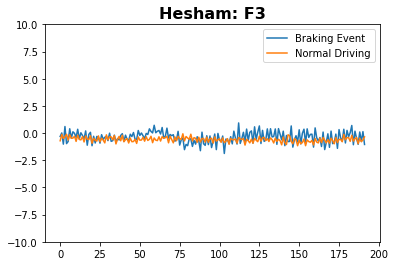

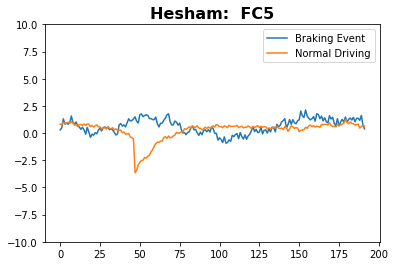

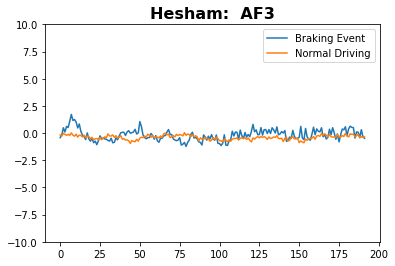

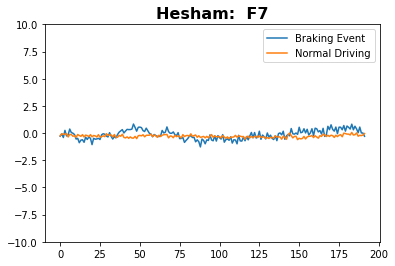

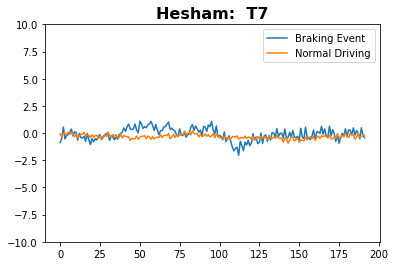

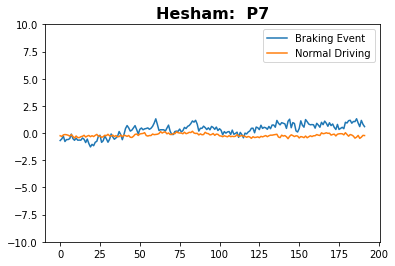

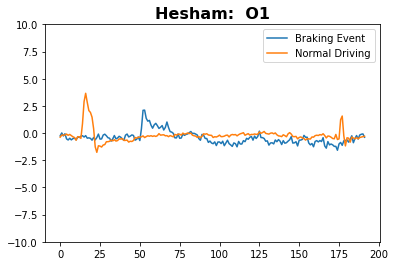

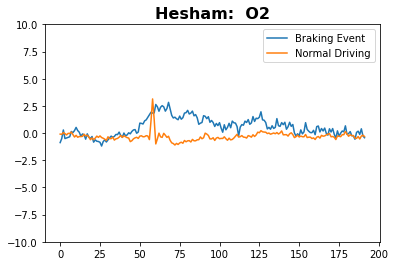

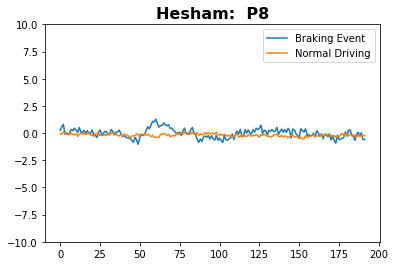

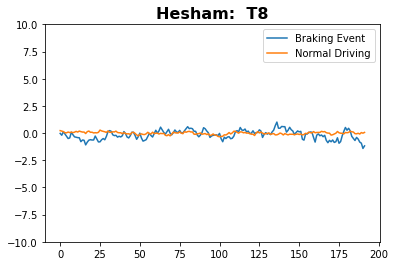

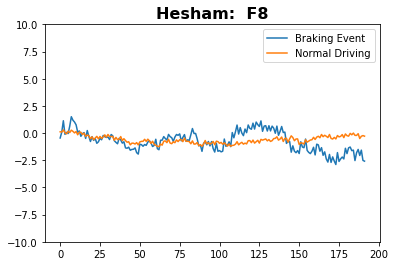

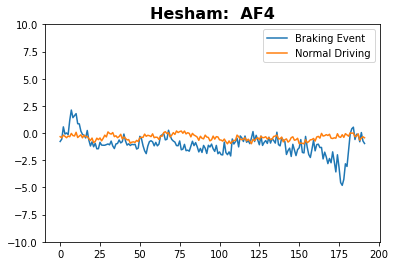

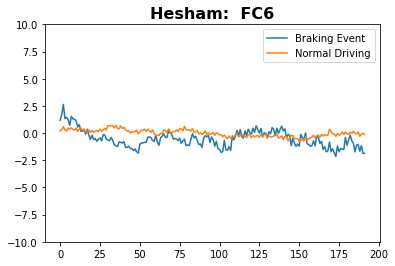

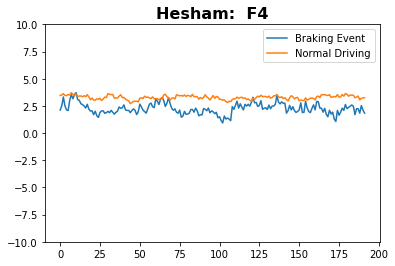

['F3.0',
 'F3.1',
 'F3.2',
 'F3.3',
 'F3.4',
 'F3.5',
 'F3.6',
 'F3.7',
 'F3.8',
 'F3.9',
 'F3.10',
 'F3.11',
 'F3.12',
 'F3.13',
 'F3.14',
 'F3.15',
 'F3.16',
 'F3.17',
 'F3.18',
 'F3.19',
 'F3.20',
 'F3.21',
 'F3.22',
 'F3.23',
 'F3.24',
 'F3.25',
 'F3.26',
 'F3.27',
 'F3.28',
 'F3.29',
 'F3.30',
 'F3.31',
 'F3.32',
 'F3.33',
 'F3.34',
 'F3.35',
 'F3.36',
 'F3.37',
 'F3.38',
 'F3.39',
 'F3.40',
 'F3.41',
 'F3.42',
 'F3.43',
 'F3.44',
 'F3.45',
 'F3.46',
 'F3.47',
 'F3.48',
 'F3.49',
 'F3.50',
 'F3.51',
 'F3.52',
 'F3.53',
 'F3.54',
 'F3.55',
 'F3.56',
 'F3.57',
 'F3.58',
 'F3.59',
 'F3.60',
 'F3.61',
 'F3.62',
 'F3.63',
 'F3.64',
 'F3.65',
 'F3.66',
 'F3.67',
 'F3.68',
 'F3.69',
 'F3.70',
 'F3.71',
 'F3.72',
 'F3.73',
 'F3.74',
 'F3.75',
 'F3.76',
 'F3.77',
 'F3.78',
 'F3.79',
 'F3.80',
 'F3.81',
 'F3.82',
 'F3.83',
 'F3.84',
 'F3.85',
 'F3.86',
 'F3.87',
 'F3.88',
 'F3.89',
 'F3.90',
 'F3.91',
 'F3.92',
 'F3.93',
 'F3.94',
 'F3.95',
 'F3.96',
 'F3.97',
 'F3.98',
 'F3.99',
 'F3.100',

In [117]:
upload_and_draw("Hesham")

In [118]:
fnames = ["Subject_4", "Subject_5", "Subject_6", "Subject_7", "Subject_8"]

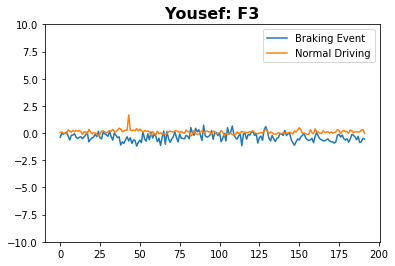

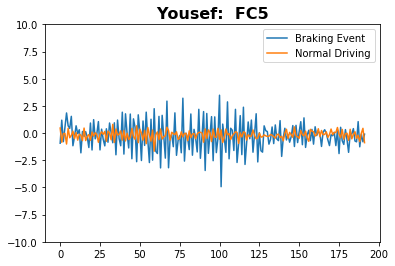

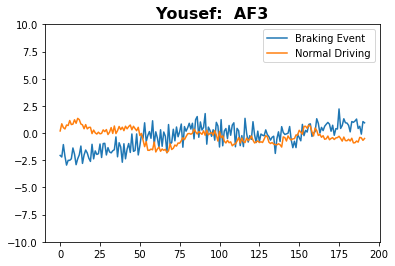

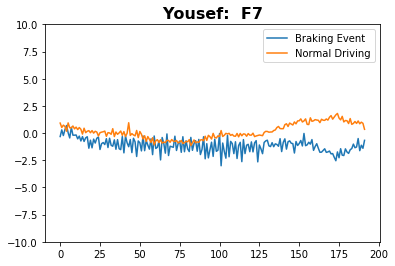

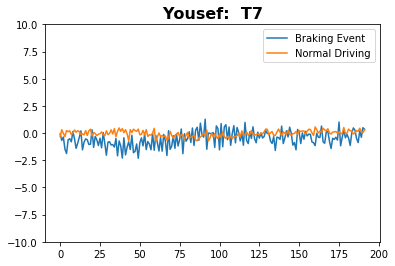

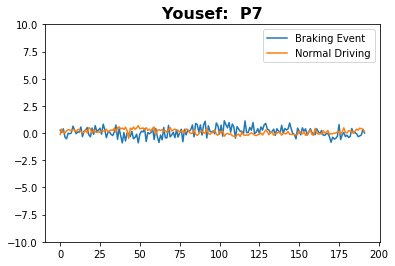

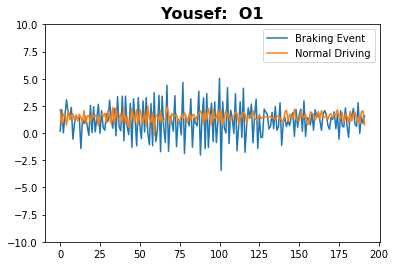

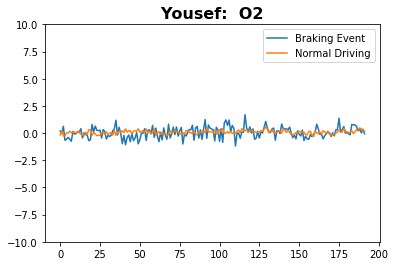

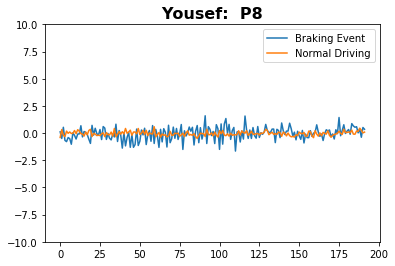

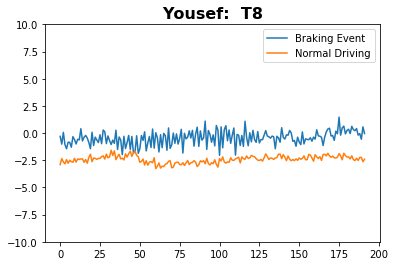

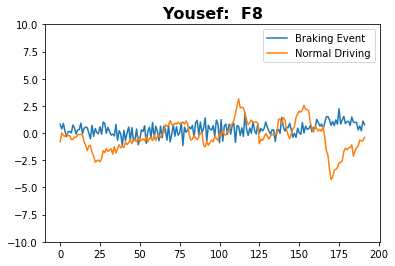

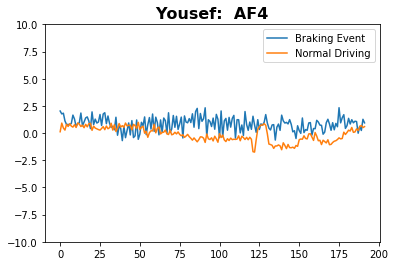

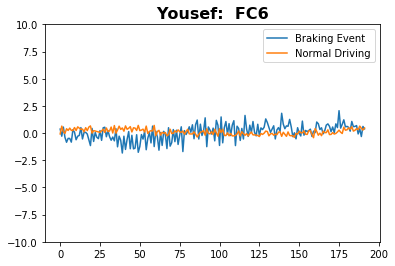

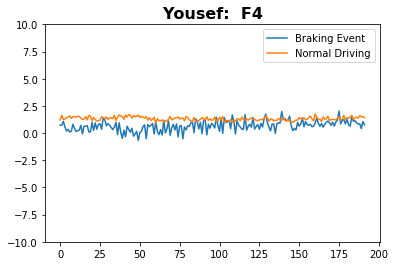

['F3.0',
 'F3.1',
 'F3.2',
 'F3.3',
 'F3.4',
 'F3.5',
 'F3.6',
 'F3.7',
 'F3.8',
 'F3.9',
 'F3.10',
 'F3.11',
 'F3.12',
 'F3.13',
 'F3.14',
 'F3.15',
 'F3.16',
 'F3.17',
 'F3.18',
 'F3.19',
 'F3.20',
 'F3.21',
 'F3.22',
 'F3.23',
 'F3.24',
 'F3.25',
 'F3.26',
 'F3.27',
 'F3.28',
 'F3.29',
 'F3.30',
 'F3.31',
 'F3.32',
 'F3.33',
 'F3.34',
 'F3.35',
 'F3.36',
 'F3.37',
 'F3.38',
 'F3.39',
 'F3.40',
 'F3.41',
 'F3.42',
 'F3.43',
 'F3.44',
 'F3.45',
 'F3.46',
 'F3.47',
 'F3.48',
 'F3.49',
 'F3.50',
 'F3.51',
 'F3.52',
 'F3.53',
 'F3.54',
 'F3.55',
 'F3.56',
 'F3.57',
 'F3.58',
 'F3.59',
 'F3.60',
 'F3.61',
 'F3.62',
 'F3.63',
 'F3.64',
 'F3.65',
 'F3.66',
 'F3.67',
 'F3.68',
 'F3.69',
 'F3.70',
 'F3.71',
 'F3.72',
 'F3.73',
 'F3.74',
 'F3.75',
 'F3.76',
 'F3.77',
 'F3.78',
 'F3.79',
 'F3.80',
 'F3.81',
 'F3.82',
 'F3.83',
 'F3.84',
 'F3.85',
 'F3.86',
 'F3.87',
 'F3.88',
 'F3.89',
 'F3.90',
 'F3.91',
 'F3.92',
 'F3.93',
 'F3.94',
 'F3.95',
 'F3.96',
 'F3.97',
 'F3.98',
 'F3.99',
 'F3.100',

In [119]:
upload_and_draw("Yousef")

In [120]:
fnames = ["Subject_1", "Subject_2"]

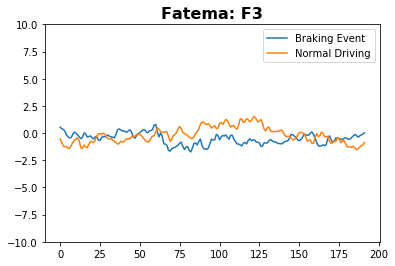

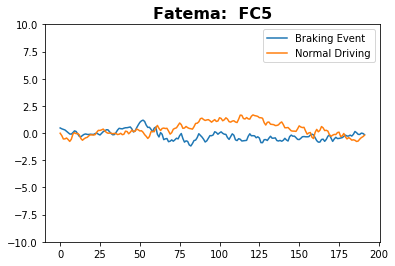

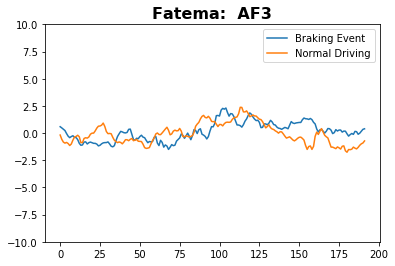

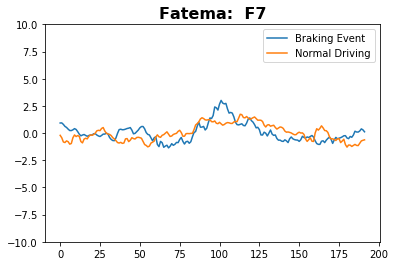

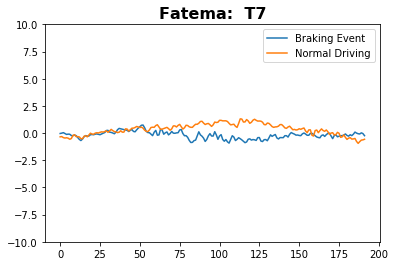

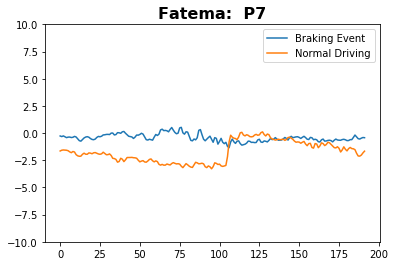

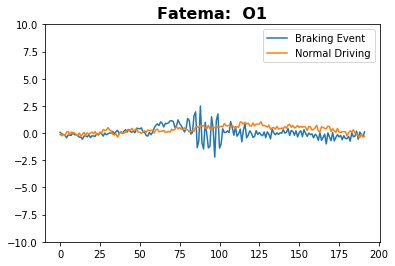

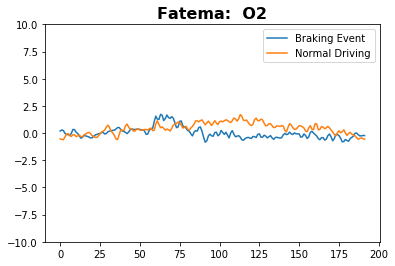

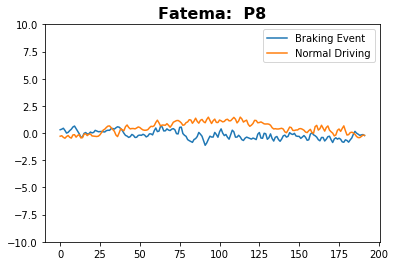

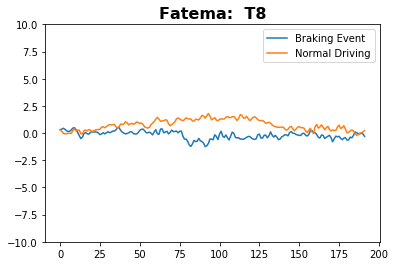

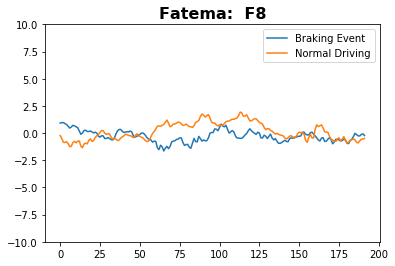

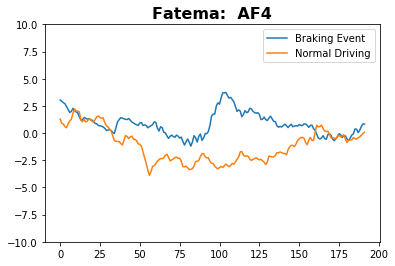

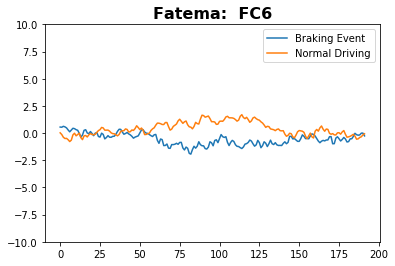

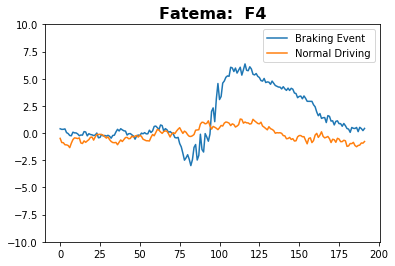

['F3.0',
 'F3.1',
 'F3.2',
 'F3.3',
 'F3.4',
 'F3.5',
 'F3.6',
 'F3.7',
 'F3.8',
 'F3.9',
 'F3.10',
 'F3.11',
 'F3.12',
 'F3.13',
 'F3.14',
 'F3.15',
 'F3.16',
 'F3.17',
 'F3.18',
 'F3.19',
 'F3.20',
 'F3.21',
 'F3.22',
 'F3.23',
 'F3.24',
 'F3.25',
 'F3.26',
 'F3.27',
 'F3.28',
 'F3.29',
 'F3.30',
 'F3.31',
 'F3.32',
 'F3.33',
 'F3.34',
 'F3.35',
 'F3.36',
 'F3.37',
 'F3.38',
 'F3.39',
 'F3.40',
 'F3.41',
 'F3.42',
 'F3.43',
 'F3.44',
 'F3.45',
 'F3.46',
 'F3.47',
 'F3.48',
 'F3.49',
 'F3.50',
 'F3.51',
 'F3.52',
 'F3.53',
 'F3.54',
 'F3.55',
 'F3.56',
 'F3.57',
 'F3.58',
 'F3.59',
 'F3.60',
 'F3.61',
 'F3.62',
 'F3.63',
 'F3.64',
 'F3.65',
 'F3.66',
 'F3.67',
 'F3.68',
 'F3.69',
 'F3.70',
 'F3.71',
 'F3.72',
 'F3.73',
 'F3.74',
 'F3.75',
 'F3.76',
 'F3.77',
 'F3.78',
 'F3.79',
 'F3.80',
 'F3.81',
 'F3.82',
 'F3.83',
 'F3.84',
 'F3.85',
 'F3.86',
 'F3.87',
 'F3.88',
 'F3.89',
 'F3.90',
 'F3.91',
 'F3.92',
 'F3.93',
 'F3.94',
 'F3.95',
 'F3.96',
 'F3.97',
 'F3.98',
 'F3.99',
 'F3.100',

In [121]:
upload_and_draw("Fatema")

In [14]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import preprocessing
from sklearn import metrics

In [51]:
def classify_diff_intervals_emotive():
    LDAClassifier = LinearDiscriminantAnalysis()
    fi = 0
    for f in fnames:
        #pos, neg = upload_file(f)
        print(f)
        for i in np.arange(12, 180, 12):
            pos, neg = upload_file(f)
            dropCols = get_drop_cols(i)
            pos = pos.drop(dropCols, axis = 1)
            neg = neg.drop(dropCols, axis = 1)
            #5 here represents number of features
            mean_features_pos, mean_features_neg = time_intervals_features(pos, neg, i, int(i*5/12))
            mean_features_pos['y'] = 1
            mean_features_neg['y'] = 0
            all_data = mean_features_pos.append(mean_features_neg)
            y = all_data['y']
            X = all_data.drop(['y'], axis=1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
            X_train = np.nan_to_num(X_train)
            X_test = np.nan_to_num(X_test)
            X_train = preprocessing.scale(X_train)
            X_test = preprocessing.scale(X_test)
            LDAClassifier.fit(X_train, y_train)
            y_predict = LDAClassifier.predict(X_test)
            print(str(i*7.8) + "ms")
            print(classification_report(y_test, y_predict))
            fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
            acc_auc = metrics.auc(fpr, tpr)
            print("AUC: " + str(acc_auc))
            print("-----------------------")
        fi += 1

In [4]:
def get_drop_cols(i1):
    dropCols = []
    nums = np.arange(i1, 192)
    for i in range(14):
        name = newCols[i*192].split('.')[0]
        dropCols.append([name + '.' + str(num) for num in nums])
    return np.array(dropCols).flatten()

In [6]:
fnames = ["Fatema", "Yousef", "Hesham", "Tair2", "Mohamed EL-Tair", "Mohamed Wagih", "Wagih2", "Hesham2"]

In [7]:
#mean of ten discriminating time intervals

def time_intervals_features(pos, neg, interval, numOfCols):
    #cols = list(pos)
    newCols = make_columns(numOfCols)
    mean_features_pos = pd.DataFrame(columns = newCols)
    mean_features_neg = pd.DataFrame(columns = newCols)
    cols = list(pos)
    for i in range(0, 14):
        for j in range(0, numOfCols):
            mean_features_pos[newCols[i*numOfCols + j]] = np.mean(pos[cols[i*interval+numOfCols*j:i*interval+numOfCols*j+int(192/numOfCols)]], axis = 1).values
            mean_features_neg[newCols[i*numOfCols + j]] = np.mean(neg[cols[i*interval+numOfCols*j:i*interval+numOfCols*j+int(192/numOfCols)]], axis = 1).values
    return mean_features_pos, mean_features_neg
    

In [21]:
def make_columns(numOfCols):
    newCols = []
    for i in range(14):
        name = cols[i*192].split('.')[0]
        newCols.append(cols[i*192:i*192+numOfCols])
    return np.array(newCols).flatten()

In [20]:
newCols = make_columns(electrodes)

In [10]:
electrodes = ['F3', ' FC5', ' AF3', ' F7', ' T7', ' P7', ' O1', ' O2', ' P8', ' T8',
       ' F8', ' AF4', ' FC6', ' F4']

In [52]:
classify_diff_intervals_emotive()

Fatema


C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


93.6ms
             precision    recall  f1-score   support

          0       0.94      0.60      0.73       167
          1       0.08      0.46      0.14        13

avg / total       0.87      0.59      0.69       180

AUC: 0.5331644403500692
-----------------------
187.2ms
             precision    recall  f1-score   support

          0       0.95      0.51      0.67       167
          1       0.09      0.62      0.16        13

avg / total       0.88      0.52      0.63       180

AUC: 0.5651773376324275
-----------------------
280.8ms
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       167
          1       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00       180

AUC: 1.0
-----------------------
374.4ms
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       167
          1       1.00      1.00      1.00        13

avg / total       1.00      1.00  

468.0ms
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        64
          1       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        66

AUC: 1.0
-----------------------
561.6ms
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        64
          1       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        66

AUC: 1.0
-----------------------
655.1999999999999ms
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        64
          1       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        66

AUC: 1.0
-----------------------
748.8ms
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        64
          1       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        6

842.4ms
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        63
          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        66

AUC: 1.0
-----------------------
936.0ms
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        63
          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        66

AUC: 1.0
-----------------------
1029.6ms
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        63
          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        66

AUC: 1.0
-----------------------
1123.2ms
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        63
          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        66

AUC: 1.

1216.8ms
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       209
          1       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00       217

AUC: 1.0
-----------------------
1310.3999999999999ms
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       209
          1       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00       217

AUC: 1.0
-----------------------
Hesham2
93.6ms
             precision    recall  f1-score   support

          0       0.94      0.88      0.91       159
          1       0.14      0.25      0.18        12

avg / total       0.88      0.84      0.86       171

AUC: 0.565251572327044
-----------------------
187.2ms
             precision    recall  f1-score   support

          0       0.92      0.83      0.87       159
          1       0.04      0.08      0.05        12

avg / total       0.86      